Sign Language recognition using FineTuning MobileNet Model

In [3]:
import numpy as np
import keras
from keras import backend as k
# from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten,Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import *
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
mobile = keras.applications.mobilenet.MobileNet()

C:\Users\Deewan SIngh\Anaconda3\lib\site-packages\keras\utils\conv_utils.py:82: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.copy(kernel[slices])


In [5]:
train_path = 'Sign-Language-Digits-Dataset/train'
valid_path = 'Sign-Language-Digits-Dataset/valid'
test_path = 'Sign-Language-Digits-Dataset/test'

In [6]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path,target_size=(224,224),batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path,target_size=(224,224),batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path,target_size=(224,224),batch_size=10,shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [61]:
def plot(ims, figsize=(12,6),rows=1,interp=False,titles = None):
#     if type(ims[0]) is np.ndarray:
#         ims = np.array(ims).astype(np.uint8)
#         if ims.shape[-1]!=3:
#             ims = ims.transpose((0,2,3,1))
    f=plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2==0 else len(ims)//rows+1
    for  i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i],interpolation=None if interp else 'none')

In [62]:
imgs, labels = next(train_batches)

In [63]:
labels.argmax(axis=1)

array([0, 8, 3, 0, 0, 6, 7, 3, 5, 8], dtype=int64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

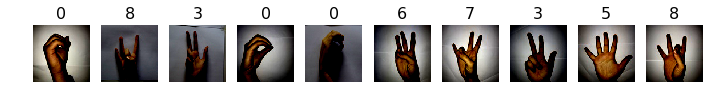

In [64]:
plot(imgs,titles = labels.argmax(axis=1))

In [20]:
x = mobile.layers[-6].output
predictions = Dense(10,activation='softmax')(x)

In [22]:
model =Model(inputs=mobile.input, outputs= predictions)

In [23]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

conv_pw_10_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_10_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_dw_11 (DepthwiseConv2D) (None, 14, 14, 512)       4608      
_________________________________________________________________
conv_dw_11_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_dw_11_relu (ReLU)       (None, 14, 14, 512)       0         
_________________________________________________________________
conv_pw_11 (Conv2D)          (None, 14, 14, 512)       262144    
_________________________________________________________________
conv_pw_11_bn (BatchNormaliz (None, 14, 14, 512)       2048      
_________________________________________________________________
conv_pw_11_relu (ReLU)       (None, 14, 14, 512)       0         
__________

In [26]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.fit_generator(train_batches,steps_per_epoch=18, validation_data= valid_batches, validation_steps=3,epochs=60,verbose=2)

Epoch 1/60
 - 153s - loss: 2.2767 - acc: 0.2611 - val_loss: 3.0078 - val_acc: 0.1667
Epoch 2/60
 - 1226s - loss: 1.3714 - acc: 0.5444 - val_loss: 2.0186 - val_acc: 0.5000
Epoch 3/60
 - 142s - loss: 0.8253 - acc: 0.7778 - val_loss: 1.1369 - val_acc: 0.7000
Epoch 4/60
 - 141s - loss: 0.7951 - acc: 0.7222 - val_loss: 1.8179 - val_acc: 0.3333
Epoch 5/60
 - 143s - loss: 0.6017 - acc: 0.8333 - val_loss: 1.6519 - val_acc: 0.4333
Epoch 6/60
 - 137s - loss: 0.7208 - acc: 0.7574 - val_loss: 1.6143 - val_acc: 0.4667
Epoch 7/60
 - 148s - loss: 0.5281 - acc: 0.8556 - val_loss: 0.9972 - val_acc: 0.7667
Epoch 8/60
 - 154s - loss: 0.5338 - acc: 0.8278 - val_loss: 0.9109 - val_acc: 0.7000
Epoch 9/60
 - 143s - loss: 0.3530 - acc: 0.9167 - val_loss: 0.7839 - val_acc: 0.7667
Epoch 10/60
 - 143s - loss: 0.2961 - acc: 0.9056 - val_loss: 0.8130 - val_acc: 0.7000
Epoch 11/60
 - 152s - loss: 0.1930 - acc: 0.9611 - val_loss: 0.7779 - val_acc: 0.7333
Epoch 12/60
 - 171s - loss: 0.1884 - acc: 0.9722 - val_loss: 0

In [28]:
test_labels = test_batches.classes

In [29]:
prediction = model.predict_generator(test_batches,steps=5,verbose=0)

In [30]:
cm = confusion_matrix(test_labels,prediction.argmax(axis=1))

In [31]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [32]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j]>thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 2 3 0 0 0 0 0 0]
 [0 0 0 0 4 0 1 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 2 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 1 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 1 0 4]]


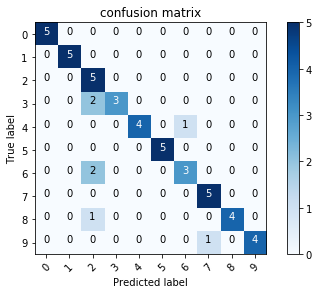

In [34]:
plot_confusion_matrix(cm,cm_plot_labels,title='confusion matrix')